In [57]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt 
%matplotlib inline
from textblob import TextBlob
import seaborn as sns
from NoelNLP import stopList
from nltk.corpus import wordnet


In [58]:
swahili = pd.read_csv(r'C:\Users\PC\Documents\Locker\swahili.csv')
swahili.head()

,Unnamed: 0,text,labels
0,0,team 2019merimera alikuwa takataka,negative
1,1,sijafurahishwa,negative
2,2,kubuni dosari,negative
3,3,bila kusema nilipoteza pesa zangu,negative
4,4,sema kupoteza pesa na wakati,negative


In [59]:
from nltk.tokenize import sent_tokenize
text = """Habari yako Musa, unafanya nini leo? Hali ya anga ni njema, na mji yapendeza. Mawingu ni kijivu."""
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['Habari yako Musa, unafanya nini leo?', 'Hali ya anga ni njema, na mji yapendeza.', 'Mawingu ni kijivu.']


In [60]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Habari', 'yako', 'Musa', ',', 'unafanya', 'nini', 'leo', '?', 'Hali', 'ya', 'anga', 'ni', 'njema', ',', 'na', 'mji', 'yapendeza', '.', 'Mawingu', 'ni', 'kijivu', '.']


In [61]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 19 samples and 22 outcomes>


In [62]:
fdist.most_common(2)

[(',', 2), ('ni', 2)]

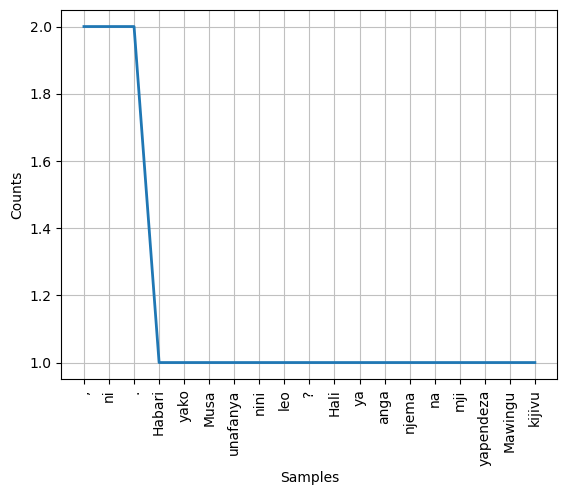

In [63]:
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

In [64]:
stop_words = stopList()
print(stop_words)


['na', 'lakini', 'ingawa', 'ingawaje', 'kwa', 'sababu', 'hadi', 'hata', 'kama', 'ambapo', 'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye', 'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu', 'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu', 'vyetu', 'yako', 'hizo', 'mimi', 'sisi', 'wewe', 'nyinyi', 'yeye', 'wao', 'nao', 'nasi', 'nanyi', 'ni', 'alikuwa', 'atakuwa', 'hii', 'hizi', 'zile', 'ile', 'hivi', 'vile', 'za', 'zake', 'zao', 'zenu', 'kwenye', 'katika', 'kwao', 'kwenu', 'kwetu', 'dhidi', 'kati', 'miongoni', 'katikati', 'wakati', 'kabla', 'baada', 'baadaye', 'nje', 'tena', 'mbali', 'halafu', 'hapa', 'pale', 'mara', 'yoyote', 'wowote', 'chochote', 'vyovyote', 'yeyote', 'lolote', 'mwenye', 'mwenyewe', 'lenyewe', 'lenye', 'wote', 'lote', 'vyote', 'nyote', 'kila', 'zaidi', 'hapana', 'ndiyo', 'au', 'ama', 'sio', 'siye', 'tu', 'budi', 'nyingi', 'nyingine', 'wengine', 'mwingine', 'zingine', 'lingine', 'kingine', 'chote', 'sasa', 'basi', 'bila', 'cha', 'chini', 'hapo', 'huku', 'kule', 'humu',

In [65]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)


Tokenized Sentence: ['Habari', 'yako', 'Musa', ',', 'unafanya', 'nini', 'leo', '?', 'Hali', 'ya', 'anga', 'ni', 'njema', ',', 'na', 'mji', 'yapendeza', '.', 'Mawingu', 'ni', 'kijivu', '.']
Filtered Sentence: ['Habari', 'Musa', ',', 'unafanya', 'leo', '?', 'Hali', 'anga', 'njema', ',', 'mji', 'yapendeza', '.', 'Mawingu', 'kijivu', '.']


In [66]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Habari', 'Musa', ',', 'unafanya', 'leo', '?', 'Hali', 'anga', 'njema', ',', 'mji', 'yapendeza', '.', 'Mawingu', 'kijivu', '.']
Stemmed Sentence: ['habari', 'musa', ',', 'unafanya', 'leo', '?', 'hali', 'anga', 'njema', ',', 'mji', 'yapendeza', '.', 'mawingu', 'kijivu', '.']


In [67]:
#performing stemming and lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "Ambatanisha"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:", stem.stem(word))

Lemmatized Word: Ambatanisha
Stemmed Word: ambatanisha


In [68]:
# POS Tagging
sent = " Eliud Kipchoge alizaliwa Nandi, Kenya mwaka wa 1984. Yeye ni mwanaspoti shupavu"
tokens=nltk.word_tokenize(sent)
print(tokens)

['Eliud', 'Kipchoge', 'alizaliwa', 'Nandi', ',', 'Kenya', 'mwaka', 'wa', '1984', '.', 'Yeye', 'ni', 'mwanaspoti', 'shupavu']
